### **Installing and importing necessary libraries**

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cupy-cuda11x -f https://pip.cupy.dev/aarch64

Restart runtime after running the previous cell

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Installing dependencies of the saved model

!pip install -r '/content/drive/MyDrive/requirements.txt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing "dimensionality.py"- this is used for the BERTopic model
import pandas as pd
import re
import numpy as np
import os
import sys
import operator

sys.path.insert(0,'/content/drive/My Drive/')
#sys.path.append('/content/drive/My Drive/')
import dimensionality
import pre_processing
from dimensionality import *
from pre_processing import *

In [ ]:
train_set = train_set.reset_index(drop= True)
val_set = val_set.reset_index(drop= True)

## **Model Evaluation**
Next, we conduct model evaluation, after labeling the validation dataset based on the themes generated in the previous section.

In [ ]:
val_set= pd.read_csv('/content/drive/MyDrive/cs_val_set.csv')
# doing some data pre-processing:

In [ ]:
#dropping empty rows
val_set = val_set.dropna(how='any',axis=0)
val_set = val_set.reset_index(drop= True)

In [ ]:
#replacing unwanted quotation marks
for i,topic_name in enumerate(val_set['topic']):
  val_set['topic'][i] = topic_name.replace("'", "")

In [ ]:
#more renaming
for i,topic_name in enumerate(val_set['topic']):
  if val_set['topic'][i] == 'mathematics':
    val_set['topic'][i] = "other"
  elif val_set['topic'][i] == 'cloud computing':
    val_set['topic'][i] = "servers"

In [ ]:
# creating a dictionary that corresponds to the theme names and numbers of the topic model
topic_dict= {-1:'other',0:'network_communication',1:'sound',2:'cybersecurity',3:'social networks',4:'programming',
5:'neural networks', 6:'memory & processors',7:'language', 8:'vision',9:'robotics', 10:'blockchain',11:'recommendation systems',
12: 'VR',13:'reinforcement learning', 14:'games', 15:'fairness', 16: 'grids', 17:'servers',18:'vehicles',  19:'voting',20:'auctions',
21:'ethics',22:'quantum computing', 23:'clustering' ,24:'emotion_recognition'}

#reversing the dictionary
rvsd= reverse_idx(topic_dict)
print(rvsd)

{'other': -1, 'network_communication': 0, 'sound': 1, 'cybersecurity': 2, 'social networks': 3, 'programming': 4, 'neural networks': 5, 'memory & processors': 6, 'language': 7, 'vision': 8, 'robotics': 9, 'blockchain': 10, 'recommendation systems': 11, 'VR': 12, 'reinforcement learning': 13, 'games': 14, 'fairness': 15, 'grids': 16, 'servers': 17, 'vehicles': 18, 'voting': 19, 'auctions': 20, 'ethics': 21, 'quantum computing': 22, 'clustering': 23, 'emotion_recognition': 24}


In [ ]:
#encoding the theme names
val_set = map_labels(val_set, 'topic', rvsd)
val_set

In [ ]:
#dropping rows with empty cells
val_set = val_set.dropna(how='any',axis=0)
val_set = val_set.reset_index(drop= True)

In [ ]:
#predicting themes of the test set using our topic model
test_docs  =val_set['abstract']
predicted_topics, probs = topic_model.transform(test_docs)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
#saving predicted themes in a dataframe
y_pred= pd.DataFrame(predicted_topics, columns= ['predicted_topics'])

In [ ]:
y_test= val_set['topic']

In [ ]:
# Getting evaluations measures
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
print(classification_report(y_test,y_pred.round(), target_names= list(topic_dict.values())))

                        precision    recall  f1-score   support

                 other       0.96      0.42      0.58       228
 network_communication       0.95      0.84      0.89        50
                 sound       0.88      1.00      0.94        23
         cybersecurity       0.77      0.73      0.75        41
       social networks       0.68      0.97      0.80        58
           programming       0.72      0.81      0.76        36
       neural networks       0.70      0.95      0.80        39
   memory & processors       0.67      0.94      0.78        32
              language       0.73      0.87      0.80        47
                vision       0.91      0.95      0.93        41
              robotics       0.72      0.93      0.81        14
            blockchain       0.56      0.90      0.69        10
recommendation systems       1.00      0.71      0.83         7
                    VR       0.71      0.96      0.81        23
reinforcement learning       0.93      

In [ ]:
#Creating a confusion matrix
cmatrix= confusion_matrix(y_test, y_pred)


In [ ]:
#Creating a dataframe of the confusion matrix with the corresponding labels
labels= list(topic_dict.values())
labels= [label.lower() for label in labels]
confusion_matrix_df = pd.DataFrame(data = cmatrix, index =labels,
                  columns =labels)
#exporting it to drive as a csv file
confusion_matrix_df.to_csv("/content/drive/MyDrive/csmatrix.csv")


<Axes: ylabel='themes'>

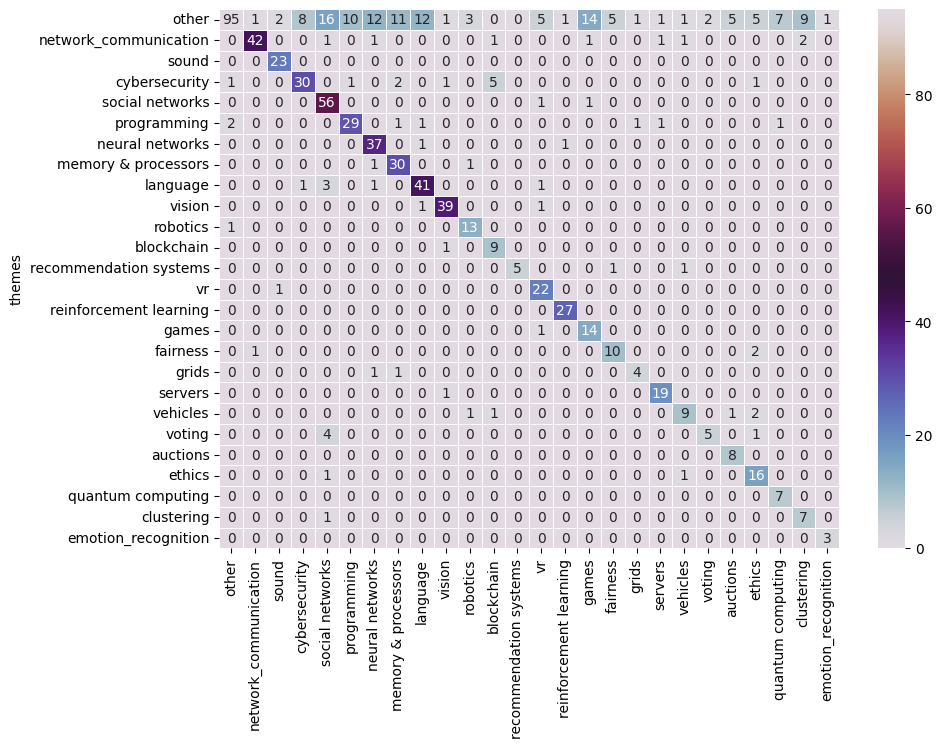

In [ ]:
# ploting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
cmap = 'PuRd'
sn.heatmap(confusion_matrix_df,cmap = 'twilight', annot=True, linewidth=.7)

